In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# Get all activity info from tools.parquet

In [7]:
retention_df = pd.read_parquet("../data/retention_activity.parquet")

In [8]:
len(retention_df)

1119622

In [4]:
retention_df.columns

Index(['trader_address', 'request_time', 'market_creator', 'request_date',
       'staking', 'month_year_week'],
      dtype='object')

In [9]:
retention_df.staking.value_counts()

staking
quickstart     1002306
pearl            70258
non_staking      47058
Name: count, dtype: int64

In [232]:
retention_df.month_year_week.value_counts()

month_year_week
Jan-06-2025    148192
Dec-09-2024    136640
Dec-16-2024    136529
Dec-30-2024    136190
Dec-23-2024    128665
Dec-02-2024    109545
Nov-18-2024     72777
Nov-25-2024     67851
Jan-13-2025     53165
Nov-11-2024     31089
Name: count, dtype: int64

In [233]:
jan6 = retention_df.loc[retention_df["month_year_week"]=="Jan-06-2025"]
len(jan6)

148192

In [5]:
jan6.staking.value_counts()

NameError: name 'jan6' is not defined

In [235]:
olas_jan6 = jan6.loc[jan6["staking"]!= "non_Olas"]
olas_jan6.trader_address.nunique()

185

In [237]:
retention_df["trader_type"] = retention_df["staking"].apply(
        lambda x: "non_Olas" if x == "non_Olas" else "Olas"
    )

In [238]:
    
active_traders = (
        retention_df.groupby(by=["month_year_week", "trader_type"])[
            "trader_address"
        ]
        .nunique()
        .reset_index(name="nr_traders")
)

In [239]:
active_traders

month_year_week trader_type  nr_traders
0      Dec-02-2024        Olas         233
1      Dec-02-2024    non_Olas         324
2      Dec-09-2024        Olas         227
3      Dec-09-2024    non_Olas         325
4      Dec-16-2024        Olas         214
5      Dec-16-2024    non_Olas         344
6      Dec-23-2024        Olas         194
7      Dec-23-2024    non_Olas         353
8      Dec-30-2024        Olas         193
9      Dec-30-2024    non_Olas         360
10     Jan-06-2025        Olas         185
11     Jan-06-2025    non_Olas         358
12     Jan-13-2025        Olas         153
13     Jan-13-2025    non_Olas         344
14     Nov-11-2024        Olas         202
15     Nov-11-2024    non_Olas         180
16     Nov-18-2024        Olas         221
17     Nov-18-2024    non_Olas         186
18     Nov-25-2024        Olas         202
19     Nov-25-2024    non_Olas         196

In [236]:
olas_data = retention_df.loc[retention_df["staking"]!= "non_Olas"]

In [ ]:
olas_data.groupby(["month_year_week"])["trader_address"].nunique

In [42]:
retention_df.staking.value_counts

<bound method IndexOpsMixin.value_counts of 0             non_Olas
1             non_Olas
2          non_staking
3                pearl
4             non_Olas
              ...     
1004966       non_Olas
1004967       non_Olas
1004960       non_Olas
1004961       non_Olas
1004969       non_Olas
Name: staking, Length: 1004970, dtype: object>

In [130]:
retention_df["trader_type"] = retention_df["staking"].apply(
    lambda x: "non_Olas" if x == "non_Olas" else "Olas"
)

In [131]:
olas_data = retention_df.loc[retention_df["trader_type"]=="Olas"]

In [132]:
jan5 = olas_data.loc[olas_data["month_year_week"]=="Jan-05-2025"]

In [134]:
jan5.trader_address.nunique()

193

In [133]:
len(jan5)

31363

In [45]:
olas_data.head()

trader_address              request_time  \
2   0x8fb970f4aff9b61e6b3bc5a8117b437b89c88711 2024-11-13 00:04:25+00:00   
3   0x1fe2b09de07475b1027b0c73a5bf52693b31a52e 2024-11-13 00:05:10+00:00   
6   0x1fe2b09de07475b1027b0c73a5bf52693b31a52e 2024-11-13 00:08:05+00:00   
10  0xd71b78ce490776a8f0cad6876ea79bc190f7bcce 2024-11-13 00:19:45+00:00   
11  0x6f40dbf1f102d47248802a423c0cd117ac4a3781 2024-11-13 00:27:30+00:00   

   market_creator request_date      staking month_year_week trader_type  
2      quickstart   2024-11-13  non_staking     Nov-13-2024        Olas  
3           pearl   2024-11-13        pearl     Nov-13-2024        Olas  
6           pearl   2024-11-13        pearl     Nov-13-2024        Olas  
10          pearl   2024-11-13        pearl     Nov-13-2024        Olas  
11     quickstart   2024-11-13  non_staking     Nov-13-2024        Olas

<Axes: xlabel='Count', ylabel='request_date'>

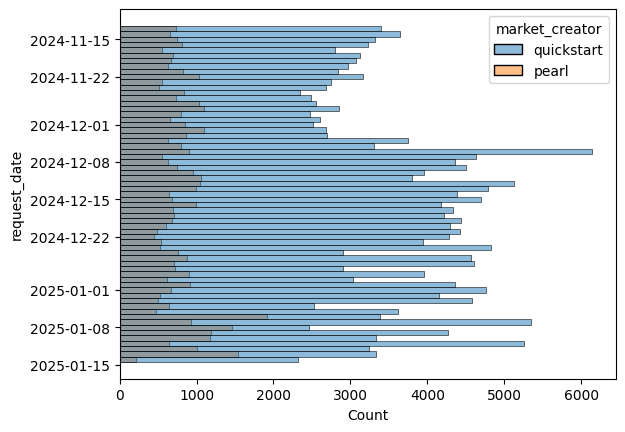

In [47]:
sns.histplot(olas_data, y="request_date", hue="market_creator")

In [29]:
retention_df.columns

Index(['trader_address', 'request_time', 'market_creator', 'request_date',
       'staking', 'month_year_week'],
      dtype='object')

<Axes: xlabel='Count', ylabel='request_date'>

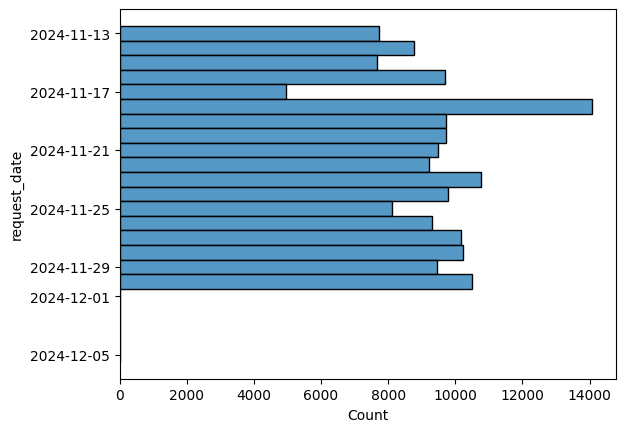

In [35]:
import seaborn as sns

sns.histplot(retention_df, y="request_date")

In [30]:
min(retention_df.request_time)

Timestamp('2024-10-25 00:00:20+0000', tz='UTC')

In [31]:
from datetime import datetime
cutoff_date1 = "2024-11-13"
timestamp1 = pd.Timestamp(
datetime.strptime(cutoff_date1, "%Y-%m-%d")
).tz_localize("UTC")

In [32]:
retention_df = retention_df.loc[retention_df["request_time"]>=timestamp1]
min(retention_df.request_time)

Timestamp('2024-11-13 00:00:15+0000', tz='UTC')

In [34]:
retention_df.columns

Index(['trader_address', 'request_time', 'market_creator', 'request_date',
       'staking', 'month_year_week'],
      dtype='object')

In [33]:
retention_df.to_parquet("../data/retention_activity.parquet", index=False)

In [13]:
retention_df.head()

trader_address              request_time  \
0  0x721de88cee9be146c8f0c7ef1a4188bee36494d6 2024-10-25 00:00:20+00:00   
1  0x8a1d5f22b5a3bea34697b85e7b4ad894bf9ee36a 2024-10-25 00:00:25+00:00   
2  0xf839eaf4b42eadd917b46d7b6da0dd0e1fd6f684 2024-10-25 00:00:55+00:00   
3  0x01274796ce41aa8e8312e05a427ffb4b0d2148f6 2024-10-25 00:00:55+00:00   
4  0xc20678890f94d0162593c46fe5da67d9a4b7a6fb 2024-10-25 00:01:05+00:00   

  market_creator request_date      staking month_year_week  
0     quickstart   2024-10-25  non_staking     Oct-25-2024  
1     quickstart   2024-10-25  non_staking     Oct-25-2024  
2     quickstart   2024-10-25  non_staking     Oct-25-2024  
3     quickstart   2024-10-25  non_staking     Oct-25-2024  
4     quickstart   2024-10-25  non_staking     Oct-25-2024

In [105]:
retention_df.staking.value_counts()

staking
non_Olas       738323
non_staking    199043
pearl           44001
quickstart      39276
Name: count, dtype: int64

In [14]:
retention_df.staking.value_counts()

staking
non_Olas       764956
non_staking    275246
pearl           56487
quickstart      48511
Name: count, dtype: int64

## Join the two datasets

In [135]:
def prepare_retention_dataset(
    retention_df: pd.DataFrame, unknown_df: pd.DataFrame
) -> pd.DataFrame:

    retention_df["trader_type"] = retention_df["staking"].apply(
        lambda x: "non_Olas" if x == "non_Olas" else "Olas"
    )
    retention_df.rename(columns={"request_time": "creation_timestamp"}, inplace=True)
    retention_df = retention_df[
        ["trader_type", "market_creator", "trader_address", "creation_timestamp"]
    ]
    unknown_df["trader_type"] = "unclassified"
    unknown_df = unknown_df[
        ["trader_type", "market_creator", "trader_address", "creation_timestamp"]
    ]
    all_traders = pd.concat([retention_df, unknown_df], ignore_index=True)

    all_traders["creation_timestamp"] = pd.to_datetime(
        all_traders["creation_timestamp"]
    )
    all_traders = all_traders.sort_values(by="creation_timestamp", ascending=True)
    all_traders["month_year_week"] = (
        all_traders["creation_timestamp"].dt.to_period("W").dt.strftime("%b-%d-%Y")
    )
    return all_traders

In [94]:

unknown_df = pd.read_parquet("../data/unknown_traders.parquet")


In [26]:
unknown_df.staking.value_counts()

staking
non_Olas    1654
Name: count, dtype: int64

In [23]:
unknown_df["trader_type"] = "unclassified"

In [136]:
all_traders = prepare_retention_dataset(retention_df=retention_df, unknown_df=unknown_df)

/var/folders/gp/02mb1d514ng739czlxw1lhh00000gn/T/ipykernel_51242/2945974734.py:23: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  all_traders["creation_timestamp"].dt.to_period("W").dt.strftime("%b-%d-%Y")


In [137]:
all_traders.trader_type.value_counts()

trader_type
non_Olas        738323
Olas            282320
unclassified      3531
Name: count, dtype: int64

In [138]:
# First, create week numbers from timestamps
all_traders["creation_timestamp"] = pd.to_datetime(all_traders["creation_timestamp"])
all_traders = all_traders.sort_values(by="creation_timestamp", ascending=True)
all_traders["month_year_week"] = (
all_traders["creation_timestamp"].dt.to_period("W").dt.strftime("%b-%d-%Y")
)

/var/folders/gp/02mb1d514ng739czlxw1lhh00000gn/T/ipykernel_51242/2488528526.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  all_traders["creation_timestamp"].dt.to_period("W").dt.strftime("%b-%d-%Y")


# WoW Retention

In [212]:
def calculate_wow_retention_by_type(
    df: pd.DataFrame, market_creator: str
) -> pd.DataFrame:
    filtered_df = df.loc[df["market_creator"] == market_creator]
    # Get unique traders per week and type
    weekly_traders = filtered_df.groupby(['month_year_week', 'trader_type'], sort=False)['trader_address'].nunique().reset_index()
    #weekly_traders = weekly_traders.sort_values(['trader_type', 'month_year_week'])
    # Get ordered list of unique weeks - converting to datetime for proper sorting
    all_weeks = filtered_df["month_year_week"].unique()
    weeks_datetime = pd.to_datetime(all_weeks)
    sorted_weeks_idx = weeks_datetime.argsort()
    all_weeks = all_weeks[sorted_weeks_idx]

    # Create mapping from week string to numeric index
    week_to_number = {week: idx for idx, week in enumerate(all_weeks)}
    # Calculate retention
    retention = []
    # Iterate through each trader type
    for trader_type in weekly_traders['trader_type'].unique():
        type_data = weekly_traders[weekly_traders['trader_type'] == trader_type]
        
        # Calculate retention for each week within this trader type
        for i in range(1, len(type_data)):
            current_week = type_data.iloc[i]['month_year_week']
            print(f"current_week={current_week}")
            week_number = week_to_number[current_week]
            if week_to_number == 0:
                # no previous week info
                continue
            previous_week_number = week_number -1
            # this should give only one value
            previous_week = [key for key in week_to_number.keys() if week_to_number[key] == previous_week_number][0]
            #previous_week = type_data.iloc[i-1]['month_year_week']
            print(f"previous week = {previous_week}")
            
            # Get traders in both weeks for this type
            current_traders = set(df[
                (df['month_year_week'] == current_week) & 
                (df['trader_type'] == trader_type)
            ]['trader_address'])
            
            previous_traders = set(df[
                (df['month_year_week'] == previous_week) & 
                (df['trader_type'] == trader_type)
            ]['trader_address'])
            
            retained = len(current_traders.intersection(previous_traders))
            retention_rate = (retained / len(previous_traders)) * 100 if len(previous_traders) > 0 else 0
            
            retention.append({
                'trader_type': trader_type,
                'week': current_week,
                'retained_traders': retained,
                'new_traders': 
                'previous_traders': len(previous_traders),
                'retention_rate': round(retention_rate, 2)
            })
    
    return pd.DataFrame(retention)

In [213]:
wow_retention = calculate_wow_retention_by_type(all_traders, market_creator="pearl")

current_week=Nov-24-2024
previous week = Nov-17-2024
current_week=Dec-01-2024
previous week = Nov-24-2024
current_week=Dec-08-2024
previous week = Dec-01-2024
current_week=Dec-15-2024
previous week = Dec-08-2024
current_week=Dec-22-2024
previous week = Dec-15-2024
current_week=Dec-29-2024
previous week = Dec-22-2024
current_week=Jan-05-2025
previous week = Dec-29-2024
current_week=Jan-12-2025
previous week = Jan-05-2025
current_week=Jan-19-2025
previous week = Jan-12-2025
current_week=Nov-24-2024
previous week = Nov-17-2024
current_week=Dec-01-2024
previous week = Nov-24-2024
current_week=Dec-08-2024
previous week = Dec-01-2024
current_week=Dec-15-2024
previous week = Dec-08-2024
current_week=Dec-22-2024
previous week = Dec-15-2024
current_week=Dec-29-2024
previous week = Dec-22-2024
current_week=Jan-05-2025
previous week = Dec-29-2024
current_week=Jan-12-2025
previous week = Jan-05-2025
current_week=Jan-19-2025
previous week = Jan-12-2025
current_week=Nov-24-2024
previous week = Nov-1

In [216]:
jan5 = wow_retention.loc[wow_retention["week"]=="Jan-05-2025"]
jan5

trader_type       week  retained_traders  previous_traders  \
6       non_Olas 2025-01-05               333               353   
15          Olas 2025-01-05               177               194   
24  unclassified 2025-01-05                 2                19   

    retention_rate  
6            94.33  
15           91.24  
24           10.53

In [214]:
wow_retention.head()

trader_type         week  retained_traders  previous_traders  retention_rate
0    non_Olas  Nov-24-2024               157               180           87.22
1    non_Olas  Dec-01-2024               173               186           93.01
2    non_Olas  Dec-08-2024               182               196           92.86
3    non_Olas  Dec-15-2024               303               324           93.52
4    non_Olas  Dec-22-2024               313               325           96.31

In [141]:
wow_retention.head()

trader_type         week  retained_traders  previous_traders  retention_rate
0        Olas  Dec-08-2024               187               202           92.57
1        Olas  Dec-15-2024               212               233           90.99
2        Olas  Dec-22-2024               204               227           89.87
3        Olas  Dec-29-2024               187               214           87.38
4        Olas  Jan-05-2025               177               194           91.24

In [39]:
non_olas = wow_retention.loc[wow_retention["trader_type"]=="non_Olas"]
non_olas

trader_type       week  retained_traders  previous_traders  retention_rate
9     non_Olas 2024-12-08               154               154          100.00
10    non_Olas 2024-12-15               301               324           92.90
11    non_Olas 2024-12-22               310               321           96.57
12    non_Olas 2024-12-29               312               341           91.50
13    non_Olas 2025-01-05               304               326           93.25
14    non_Olas 2025-01-12               246               333           73.87
15    non_Olas 2024-11-10                51               251           20.32
16    non_Olas 2024-11-17                90               100           90.00
17    non_Olas 2024-11-24               151               181           83.43

In [142]:
import plotly.express as px
import plotly.graph_objects as go

def plot_wow_retention_by_type(wow_retention):
    wow_retention['week'] = pd.to_datetime(wow_retention['week'])
    wow_retention = wow_retention.sort_values(['trader_type', 'week'])
    fig = px.line(
        wow_retention, 
        x='week', 
        y='retention_rate',
        color='trader_type',
        markers=True,
        title='Weekly Retention Rate by Trader Type',
        labels={
            'week': 'Week',
            'retention_rate': 'Retention Rate (%)',
            'trader_type': 'Trader Type'
        }
    )
    
    fig.update_layout(
        hovermode='x unified',
        legend=dict(
            yanchor="middle",
            y=0.5,
            xanchor="left",
            x=1.02,  # Move legend outside
            orientation="v"
        ),
        yaxis=dict(
            ticksuffix='%',
            range=[0, max(wow_retention['retention_rate']) * 1.1]  # Add 10% padding to y-axis
        ),
        xaxis=dict(
            tickformat='%Y-%m-%d'
        ),
        margin=dict(r=150)  # Add right margin to make space for legend
    )
    
    # Add hover template
    fig.update_traces(
        hovertemplate='<b>%{y:.1f}%</b><br>Week: %{x|%Y-%m-%d}<extra></extra>'
    )
    
    return fig



In [215]:
# Create and show the plot
fig = plot_wow_retention_by_type(wow_retention)
fig.show()

In [143]:
# Create and show the plot
fig = plot_wow_retention_by_type(wow_retention)
fig.show()

# Cohort retention OLD computation

In [79]:
def calculate_cohort_retention(
    df: pd.DataFrame, market_creator: str, trader_type: str
) -> pd.DataFrame:
    df_filtered = df.loc[
        (df["market_creator"] == market_creator) & (df["trader_type"] == trader_type)
    ]
    # Get first week for each trader
    first_trades = (
        df_filtered.groupby("trader_address")
        .agg({"creation_timestamp": "min", "month_year_week": "first"})
        .reset_index()
    )
    first_trades.columns = ["trader_address", "first_trade", "cohort_week"]

    # Get ordered list of unique weeks - converting to datetime for proper sorting
    all_weeks = df_filtered["month_year_week"].unique()
    weeks_datetime = pd.to_datetime(all_weeks)
    sorted_weeks_idx = weeks_datetime.argsort()
    all_weeks = all_weeks[sorted_weeks_idx]
    print(f"all_weeks={all_weeks}")

    # Create mapping from week string to numeric index
    week_to_number = {week: idx for idx, week in enumerate(all_weeks)}

    # Merge back to get all activities
    cohort_data = pd.merge(
        df_filtered,
        first_trades[["trader_address", "cohort_week"]],
        on="trader_address",
    )
    print(cohort_data.tail())
    print(cohort_data.cohort_week.value_counts())

    # Calculate week number since first activity
    cohort_data["cohort_number"] = cohort_data["cohort_week"].map(week_to_number)
    cohort_data["activity_number"] = cohort_data["month_year_week"].map(week_to_number)
    cohort_data["week_number"] = (
        cohort_data["activity_number"] - cohort_data["cohort_number"]
    )

    # Calculate retention by cohort
    cohort_sizes = cohort_data.groupby("cohort_week")["trader_address"].nunique()
    print("COHORT SIZES")
    print(cohort_sizes)
    retention_matrix = cohort_data.groupby(["cohort_week", "week_number"])[
        "trader_address"
    ].nunique()
    retention_matrix = retention_matrix.unstack(fill_value=0)

    # Convert to percentages
    retention_matrix = retention_matrix.div(cohort_sizes, axis=0) * 100

    # Sort index (cohort_week) chronologically
    retention_matrix.index = pd.to_datetime(retention_matrix.index)
    retention_matrix = retention_matrix.sort_index()

    return retention_matrix.round(2)

In [51]:
def prepare_retention_dataset(
    retention_df: pd.DataFrame, unknown_df: pd.DataFrame
) -> pd.DataFrame:

    retention_df["trader_type"] = retention_df["staking"].apply(
        lambda x: "non_Olas" if x == "non_Olas" else "Olas"
    )
    retention_df.rename(columns={"request_time": "creation_timestamp"}, inplace=True)
    retention_df = retention_df[
        ["trader_type", "market_creator", "trader_address", "creation_timestamp"]
    ]
    unknown_df["trader_type"] = "unclassified"
    unknown_df = unknown_df[
        ["trader_type", "market_creator", "trader_address", "creation_timestamp"]
    ]
    all_traders = pd.concat([retention_df, unknown_df], ignore_index=True)

    all_traders["creation_timestamp"] = pd.to_datetime(
        all_traders["creation_timestamp"]
    )
    all_traders = all_traders.sort_values(by="creation_timestamp", ascending=True)
    all_traders["month_year_week"] = (
        all_traders["creation_timestamp"].dt.to_period("W").dt.strftime("%b-%d-%Y")
    )
    return all_traders

In [169]:
all_traders = prepare_retention_dataset(retention_df=retention_df, unknown_df=unknown_df)

/var/folders/gp/02mb1d514ng739czlxw1lhh00000gn/T/ipykernel_51242/2945974734.py:23: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [144]:
olas_cohort_pearl = calculate_cohort_retention(df=all_traders, market_creator="pearl", trader_type="Olas")

all_weeks=['Nov-17-2024' 'Nov-24-2024' 'Dec-01-2024' 'Dec-08-2024' 'Dec-15-2024'
 'Dec-22-2024' 'Dec-29-2024' 'Jan-05-2025' 'Jan-12-2025' 'Jan-19-2025']
      trader_type market_creator                              trader_address  \
49834        Olas          pearl  0x92b62e835d5ebf0e79b76715fcb87284e069ff81   
49835        Olas          pearl  0x92b62e835d5ebf0e79b76715fcb87284e069ff81   
49836        Olas          pearl  0x92b62e835d5ebf0e79b76715fcb87284e069ff81   
49837        Olas          pearl  0x92b62e835d5ebf0e79b76715fcb87284e069ff81   
49838        Olas          pearl  0x3badd0a1beb34fc1532f6c717fa857b3325da184   

             creation_timestamp month_year_week  cohort_week  
49834 2025-01-15 13:45:45+00:00     Jan-19-2025  Nov-17-2024  
49835 2025-01-15 13:48:30+00:00     Jan-19-2025  Nov-17-2024  
49836 2025-01-15 13:52:00+00:00     Jan-19-2025  Nov-17-2024  
49837 2025-01-15 13:55:50+00:00     Jan-19-2025  Nov-17-2024  
49838 2025-01-15 14:01:00+00:00     Jan-19-2025  No

In [72]:
olas_cohort_pearl.tail()

week_number      0      1      2      3      4     5     6    7    8    9
cohort_week                                                              
2024-12-08   100.0  83.33  66.67  66.67  33.33  50.0  50.0  0.0  0.0  0.0
2024-12-15   100.0  40.00  30.00  30.00  20.00   0.0   0.0  0.0  0.0  0.0
2024-12-22   100.0   0.00   0.00   0.00   0.00   0.0   0.0  0.0  0.0  0.0
2024-12-29   100.0   0.00   0.00   0.00   0.00   0.0   0.0  0.0  0.0  0.0
2025-01-19   100.0   0.00   0.00   0.00   0.00   0.0   0.0  0.0  0.0  0.0

In [54]:
olas_cohort_pearl.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='week_number')

In [145]:
olas_data.rename(columns={"request_time": "creation_timestamp"}, inplace=True)

/var/folders/gp/02mb1d514ng739czlxw1lhh00000gn/T/ipykernel_51242/3309953326.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [146]:
olas_data = olas_data.sort_values(by="creation_timestamp", ascending=True)
olas_data["month_year_week"] = (
        olas_data["creation_timestamp"].dt.to_period("W").dt.strftime("%b-%d-%Y")
    )

/var/folders/gp/02mb1d514ng739czlxw1lhh00000gn/T/ipykernel_51242/1537996894.py:3: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [147]:
first_trades = (
        olas_data.groupby("trader_address")
        .agg({"creation_timestamp": "min", "month_year_week": "first"})
        .reset_index()
    )
first_trades.columns = ["trader_address", "first_trade", "cohort_week"]

In [151]:
first_trades.cohort_week.value_counts()

cohort_week
Nov-17-2024    202
Nov-24-2024     30
Dec-01-2024     12
Dec-08-2024     12
Dec-15-2024     10
Dec-22-2024      2
Jan-05-2025      1
Jan-19-2025      1
Dec-29-2024      1
Name: count, dtype: int64

In [150]:
first_trades.loc[first_trades["cohort_week"]=="Jan-05-2025"]

trader_address               first_trade  \
74  0x3784c7866a0d308d72719aa17e888b457d399ca7 2025-01-01 14:46:45+00:00   

    cohort_week  
74  Jan-05-2025

In [152]:
all_weeks = olas_data["month_year_week"].unique()
all_weeks

array(['Nov-17-2024', 'Nov-24-2024', 'Dec-01-2024', 'Dec-08-2024',
       'Dec-15-2024', 'Dec-22-2024', 'Dec-29-2024', 'Jan-05-2025',
       'Jan-12-2025', 'Jan-19-2025'], dtype=object)

In [123]:
all_weeks = olas_data["month_year_week"].unique()
weeks_datetime = pd.to_datetime(all_weeks)
sorted_weeks_idx = weeks_datetime.argsort()
all_weeks = all_weeks[sorted_weeks_idx]

In [124]:
all_weeks

array(['Nov-17-2024', 'Nov-24-2024', 'Dec-01-2024', 'Dec-08-2024',
       'Dec-15-2024', 'Dec-22-2024', 'Dec-29-2024', 'Jan-05-2025',
       'Jan-12-2025', 'Jan-19-2025'], dtype=object)

In [153]:
# Create mapping from week string to numeric index
week_to_number = {week: idx for idx, week in enumerate(all_weeks)}

In [154]:
week_to_number

{'Nov-17-2024': 0,
 'Nov-24-2024': 1,
 'Dec-01-2024': 2,
 'Dec-08-2024': 3,
 'Dec-15-2024': 4,
 'Dec-22-2024': 5,
 'Dec-29-2024': 6,
 'Jan-05-2025': 7,
 'Jan-12-2025': 8,
 'Jan-19-2025': 9}

In [155]:
# Merge back to get all activities
cohort_data = pd.merge(
    olas_data,
    first_trades[["trader_address", "cohort_week"]],
    on="trader_address",
)

In [156]:
cohort_data.head()

trader_address        creation_timestamp  \
0  0x1c1bb5398ba525c5bca07eeade45958e455de4b3 2024-11-14 00:00:05+00:00   
1  0xf839eaf4b42eadd917b46d7b6da0dd0e1fd6f684 2024-11-14 00:00:10+00:00   
2  0xa761001fdebabef8f8c2efe91850c3b8b69c2769 2024-11-14 00:00:15+00:00   
3  0xc598397ce2b8bdf93071c0446d1eedc2141f01d0 2024-11-14 00:00:15+00:00   
4  0x01274796ce41aa8e8312e05a427ffb4b0d2148f6 2024-11-14 00:00:20+00:00   

  market_creator request_date      staking month_year_week trader_type  \
0     quickstart   2024-11-14  non_staking     Nov-17-2024        Olas   
1     quickstart   2024-11-14  non_staking     Nov-17-2024        Olas   
2     quickstart   2024-11-14  non_staking     Nov-17-2024        Olas   
3     quickstart   2024-11-14   quickstart     Nov-17-2024        Olas   
4     quickstart   2024-11-14  non_staking     Nov-17-2024        Olas   

   cohort_week  
0  Nov-17-2024  
1  Nov-17-2024  
2  Nov-17-2024  
3  Nov-17-2024  
4  Nov-17-2024

In [160]:
# Calculate week number since first activity
cohort_data["cohort_number"] = cohort_data["cohort_week"].map(week_to_number)
cohort_data["activity_number"] = cohort_data["month_year_week"].map(week_to_number)
cohort_data["week_number"] = (
    cohort_data["activity_number"] - cohort_data["cohort_number"]
)

In [ ]:
cohort_data.head()

In [ ]:
cohort_data.loc[cohort_data["trader_address"]=="0x59fab0cc4dd160862a55e5cf8b37719f156111a4"]

In [ ]:
cohort_data.loc[cohort_data["cohort_week"]=="Jan-05-2025"]

In [163]:
cohort_sizes = cohort_data.groupby("cohort_week")["trader_address"].nunique()

print(cohort_sizes)

cohort_week
Dec-01-2024     12
Dec-08-2024     12
Dec-15-2024     10
Dec-22-2024      2
Dec-29-2024      1
Jan-05-2025      1
Jan-19-2025      1
Nov-17-2024    202
Nov-24-2024     30
Name: trader_address, dtype: int64


In [104]:
cohort_sizes = cohort_data.groupby("cohort_week")["trader_address"].nunique()

print(cohort_sizes)

cohort_week
Dec-01-2024     12
Dec-08-2024     12
Dec-15-2024     10
Dec-22-2024      2
Dec-29-2024      1
Jan-05-2025      1
Jan-19-2025      1
Nov-17-2024    202
Nov-24-2024     30
Name: trader_address, dtype: int64


In [88]:
cohort_sizes = cohort_data.groupby("cohort_week")["trader_address"].nunique()
# these are the new users each week
print(cohort_sizes)

cohort_week
Dec-01-2024     10
Dec-08-2024     12
Dec-15-2024     10
Dec-22-2024      2
Dec-29-2024      1
Jan-05-2025      1
Jan-19-2025      1
Nov-17-2024    220
Nov-24-2024     16
Name: trader_address, dtype: int64


In [164]:
retention_matrix = cohort_data.groupby(["cohort_week", "week_number"])[
        "trader_address"
    ].nunique()


In [165]:
retention_matrix

cohort_week  week_number
Dec-01-2024  0               12
             1                6
             2                7
             3                6
             4                4
             5                4
             6                2
             7                2
Dec-08-2024  0               12
             1                9
             2                8
             3                8
             4                5
             5                6
             6                7
Dec-15-2024  0               10
             1                4
             2                3
             3                3
             4                2
Dec-22-2024  0                2
Dec-29-2024  0                1
Jan-05-2025  0                1
             1                1
Jan-19-2025  0                1
Nov-17-2024  0              202
             1              191
             2              181
             3              187
             4              175
             5 

In [166]:
retention_matrix = retention_matrix.unstack(fill_value=0)

In [167]:
retention_matrix

week_number    0    1    2    3    4    5    6    7    8    9
cohort_week                                                  
Dec-01-2024   12    6    7    6    4    4    2    2    0    0
Dec-08-2024   12    9    8    8    5    6    7    0    0    0
Dec-15-2024   10    4    3    3    2    0    0    0    0    0
Dec-22-2024    2    0    0    0    0    0    0    0    0    0
Dec-29-2024    1    0    0    0    0    0    0    0    0    0
Jan-05-2025    1    1    0    0    0    0    0    0    0    0
Jan-19-2025    1    0    0    0    0    0    0    0    0    0
Nov-17-2024  202  191  181  187  175  166  152  153  147  121
Nov-24-2024   30    9   28   26   28   26   27   27   22    0

In [54]:
first_trades = (
    all_traders.groupby("trader_address")
    .agg({"creation_timestamp": "min", "month_year_week": "first"})
    .reset_index()
)
first_trades.columns = ["trader_address", "first_trade", "cohort_week"]

In [56]:
one_trader = all_traders.loc[all_traders["trader_address"]=="0x006f70b4e3c3a3648f31ec16b2e7106fc58166f2"]
one_trader.head()

trader_address market_creator  \
15931  0x006f70b4e3c3a3648f31ec16b2e7106fc58166f2          pearl   
15933  0x006f70b4e3c3a3648f31ec16b2e7106fc58166f2          pearl   
15932  0x006f70b4e3c3a3648f31ec16b2e7106fc58166f2          pearl   

                                                trade_id  \
15931  0x0d72a8dcb46ea982ad9c82c5a6f03cba72a6b71d0x00...   
15933  0xa7392614f48e129f6796f523a47777a5f36dd7030x00...   
15932  0x8984bfbca1805f7355a49c261832043cb39b519e0x00...   

             creation_timestamp  \
15931 2024-11-12 00:36:55+00:00   
15933 2024-11-20 07:37:10+00:00   
15932 2024-11-20 07:41:00+00:00   

                                                   title market_status  \
15931  Will the Chancay mega port in Peru be virtuall...        CLOSED   
15933  Will Google issue a public apology regarding t...        CLOSED   
15932  Will Tesla confirm a location for the installa...        CLOSED   

       collateral_amount outcome_index  trade_fee_amount  \
15931                0.1             1             0.001   
15933                0.1             0             0.001   
15932                0.1             0             0.001   

       outcomes_tokens_traded  ...  earnings  redeemed  redeemed_amount  \
15931                0.224338  ...  0.000000     False              0.0   
15933                0.213349  ...  0.213349     False              0.0   
15932                0.228212  ...  0.000000     False              0.0   

       num_mech_calls  mech_fee_amount  net_earnings       roi  staking  \
15931               2             0.02     -0.121000 -1.000000    pearl   
15933               1             0.01      0.102349  0.922059    pearl   
15932               1             0.01     -0.111000 -1.000000    pearl   

       trader_type  month_year_week  
15931         Olas      Nov-17-2024  
15933         Olas      Nov-24-2024  
15932         Olas      Nov-24-2024  

[3 rows x 23 columns]

In [55]:
first_trades.head()

trader_address               first_trade  \
0  0x006f70b4e3c3a3648f31ec16b2e7106fc58166f2 2024-11-12 00:36:55+00:00   
1  0x00897abcbbefe4f558956b7a9d1b7819677e4d90 2024-11-12 09:10:25+00:00   
2  0x01274796ce41aa8e8312e05a427ffb4b0d2148f6 2024-11-08 00:26:05+00:00   
3  0x01c72d0743a22b70d73c76c5e16ba7524e20e0c0 2024-11-08 19:12:20+00:00   
4  0x0244169d0fe1014b9e71f71070099d9c2364af28 2024-11-16 06:20:25+00:00   

   cohort_week  
0  Nov-17-2024  
1  Nov-17-2024  
2  Nov-10-2024  
3  Nov-10-2024  
4  Nov-17-2024

In [57]:
all_weeks = all_traders["month_year_week"].unique()
weeks_datetime = pd.to_datetime(all_weeks)
sorted_weeks_idx = weeks_datetime.argsort()
all_weeks = all_weeks[sorted_weeks_idx]

In [58]:
all_weeks

array(['Nov-10-2024', 'Nov-17-2024', 'Nov-24-2024', 'Dec-01-2024',
       'Dec-08-2024', 'Dec-15-2024', 'Dec-22-2024', 'Dec-29-2024',
       'Jan-05-2025', 'Jan-12-2025'], dtype=object)

In [59]:
# Create mapping from week string to numeric index
week_to_number = {week: idx for idx, week in enumerate(all_weeks)}

# Merge back to get all activities
cohort_data = pd.merge(
    all_traders, first_trades[["trader_address", "cohort_week"]], on="trader_address"
)

In [60]:
cohort_data["cohort_number"] = cohort_data["cohort_week"].map(week_to_number)
cohort_data["activity_number"] = cohort_data["month_year_week"].map(week_to_number)
cohort_data["week_number"] = (
    cohort_data["activity_number"] - cohort_data["cohort_number"]
)

In [26]:
cohort_retention = calculate_cohort_retention(all_traders)

In [65]:
cohort_retention.head()

week_number      0       1      2      3      4      5      6      7      8  \
cohort_week                                                                   
2024-11-10   100.0   91.83  81.71  56.42  86.77  82.88  80.54  70.04  64.59   
2024-11-17   100.0   75.00  45.00  66.88  67.50  67.50  51.25  48.12  33.75   
2024-11-24   100.0   51.72  75.86  72.41  75.86  65.52  62.07  51.72   0.00   
2024-12-01   100.0  100.00  90.48  80.95  66.67  71.43  52.38   0.00   0.00   
2024-12-08   100.0   88.82  86.47  85.88  78.24  70.59   0.00   0.00   0.00   

week_number      9  
cohort_week         
2024-11-10   41.25  
2024-11-17    0.00  
2024-11-24    0.00  
2024-12-01    0.00  
2024-12-08    0.00

## Wow retention by cohorts

In [199]:
def calculate_cohort_retention(
    df: pd.DataFrame, market_creator: str, trader_type: str
) -> pd.DataFrame:
    df_filtered = df.loc[
        (df["market_creator"] == market_creator) & (df["trader_type"] == trader_type)
    ]
    df_filtered = df_filtered.sort_values(by="creation_timestamp", ascending=True)
    # Get first week of activity for each trader
    first_activity = (
        df_filtered.groupby("trader_address")
        .agg({"creation_timestamp": "min", "month_year_week": "first"})
        .reset_index()
    )
    first_activity.columns = ["trader_address", "first_activity", "cohort_week"]

    # Get ordered list of unique weeks - converting to datetime for proper sorting
    all_weeks = df_filtered["month_year_week"].unique()
    weeks_datetime = pd.to_datetime(all_weeks)
    sorted_weeks_idx = weeks_datetime.argsort()
    all_weeks = all_weeks[sorted_weeks_idx]

    # Create mapping from week string to numeric index
    week_to_number = {week: idx for idx, week in enumerate(all_weeks)}

    # Merge back to get all activities
    cohort_data = pd.merge(
        df_filtered,
        first_activity[["trader_address", "cohort_week"]],
        on="trader_address",
    )

    # Calculate week number since first activity
    cohort_data["cohort_number"] = cohort_data["cohort_week"].map(week_to_number)
    cohort_data["activity_number"] = cohort_data["month_year_week"].map(week_to_number)
    cohort_data["week_number"] = (
        cohort_data["activity_number"] - cohort_data["cohort_number"]
    )

    # Get all unique weeks and cohorts
    all_cohorts = cohort_data["cohort_week"].unique()
    print(f"all cohorts = {all_cohorts}")
    retention_data = []

    for cohort in all_cohorts:
        print(f"analyzing cohort {cohort}")
        # Get all traders in this cohort
        cohort_traders = set(
            cohort_data[cohort_data["cohort_week"] == cohort]["trader_address"]
        )
        cohort_size = len(cohort_traders)
        print(f"cohort size = {cohort_size}")

        if cohort_size == 0:
            print(f"NO new traders for cohort week={cohort}")
            continue

        # Calculate retention for each week after the cohort week
        for week_idx, week in enumerate(all_weeks):
            print(f"Analyzing week = {week}")
            weeks_since_cohort = week_idx -  week_to_number[cohort]
            if weeks_since_cohort < 0:
                print("Skipping")
                continue
            # Get active traders from the cohort in current week
            current_traders = set(
                cohort_data[
                    (cohort_data["cohort_week"] == cohort)
                    & (cohort_data["month_year_week"] == week)
                ]["trader_address"]
            )

            # Get active traders from the cohort in previous week
            if week == cohort:
                # For the first week, retention is 100% by definition
                retained = len(current_traders)
                retention_rate = 100 if len(current_traders) > 0 else 0
                
            elif week_idx > 0:
                previous_week = all_weeks[week_idx - 1]
                previous_traders = set(
                    cohort_data[
                        (cohort_data["cohort_week"] == cohort)
                        & (cohort_data["month_year_week"] == previous_week)
                    ]["trader_address"]
                )
                retained = len(current_traders.intersection(previous_traders))
                retention_rate = (
                    (retained / len(previous_traders)) * 100
                    if len(previous_traders) > 0
                    else 0
                )
                print(f"Retention rate = {retention_rate}")


            retention_data.append(
                {
                    "cohort_week": cohort,
                    "week": week,
                    "weeks_since_cohort": weeks_since_cohort,
                    "cohort_size": cohort_size,
                    "active_traders": len(current_traders),
                    "retained_traders": retained,
                    "previous_traders": (
                        len(previous_traders) if week_idx > 0 else cohort_size
                    ),
                    "retention_rate": round(retention_rate, 2),
                }
            )
    return pd.DataFrame(retention_data)

In [200]:
pearl_result = calculate_cohort_retention(df=all_traders, market_creator="pearl", trader_type="Olas")

all cohorts = ['Nov-17-2024' 'Nov-24-2024' 'Dec-01-2024' 'Dec-08-2024' 'Dec-15-2024'
 'Dec-22-2024' 'Dec-29-2024' 'Jan-19-2025']
analyzing cohort Nov-17-2024
cohort size = 133
Analyzing week = Nov-17-2024
Analyzing week = Nov-24-2024
Retention rate = 91.72932330827066
Analyzing week = Dec-01-2024
Retention rate = 96.72131147540983
Analyzing week = Dec-08-2024
Retention rate = 94.35483870967742
Analyzing week = Dec-15-2024
Retention rate = 90.83333333333333
Analyzing week = Dec-22-2024
Retention rate = 89.38053097345133
Analyzing week = Dec-29-2024
Retention rate = 84.90566037735849
Analyzing week = Jan-05-2025
Retention rate = 91.30434782608695
Analyzing week = Jan-12-2025
Retention rate = 91.48936170212765
Analyzing week = Jan-19-2025
Retention rate = 71.42857142857143
analyzing cohort Nov-24-2024
cohort size = 13
Analyzing week = Nov-17-2024
Skipping
Analyzing week = Nov-24-2024
Analyzing week = Dec-01-2024
Retention rate = 69.23076923076923
Analyzing week = Dec-08-2024
Retention rat

In [189]:
result = calculate_cohort_retention(df=all_traders, market_creator="quickstart", trader_type="Olas")

all cohorts = ['Nov-17-2024' 'Nov-24-2024' 'Dec-01-2024' 'Dec-08-2024' 'Jan-05-2025']
analyzing cohort Nov-17-2024
cohort size = 69
analyzing cohort Nov-24-2024
cohort size = 17
analyzing cohort Dec-01-2024
cohort size = 3
analyzing cohort Dec-08-2024
cohort size = 6
analyzing cohort Jan-05-2025
cohort size = 1


In [190]:
result.head()

cohort_week         week  weeks_since_cohort  cohort_size  active_traders  \
0  Nov-17-2024  Nov-17-2024                   0           69              69   
1  Nov-17-2024  Nov-24-2024                   1           69              69   
2  Nov-24-2024  Nov-24-2024                   0           17              17   
5  Dec-01-2024  Dec-01-2024                   0            3               3   
6  Dec-01-2024  Dec-08-2024                   1            3               0   

   retained_traders  previous_traders  retention_rate  
0                69                69           100.0  
1                69                69           100.0  
2                 0                 0             0.0  
5                 0                 0             0.0  
6                 0                 3             0.0

In [202]:
pearl_result.head()

cohort_week         week  weeks_since_cohort  cohort_size  active_traders  \
0  Nov-17-2024  Nov-17-2024                   0          133             133   
1  Nov-17-2024  Nov-24-2024                   1          133             122   
2  Nov-17-2024  Dec-01-2024                   2          133             124   
3  Nov-17-2024  Dec-08-2024                   3          133             120   
4  Nov-17-2024  Dec-15-2024                   4          133             113   

   retained_traders  previous_traders  retention_rate  
0               133               133          100.00  
1               122               133           91.73  
2               118               122           96.72  
3               117               124           94.35  
4               109               120           90.83

In [217]:
from datetime import timedelta
now = datetime.now()

# Get start of the current week (Sunday)
start_of_week = now - timedelta(days=(now.weekday()) + 1)
start_of_week = start_of_week.replace(hour=0, minute=0, second=0, microsecond=0)
print(f"start of the week = {start_of_week}")

start of the week = 2025-01-12 00:00:00


In [218]:
max(retention_df.creation_timestamp)

Timestamp('2025-01-15 14:11:00+0000', tz='UTC')

In [219]:
all_traders["creation_date"] = all_traders["creation_timestamp"].dt.date
all_traders["creation_date"] = pd.to_datetime(all_traders["creation_date"])

In [222]:
filtered_traders = all_traders[all_traders["creation_date"] < start_of_week]


In [223]:
max(filtered_traders.creation_date)

Timestamp('2025-01-11 00:00:00')

In [228]:
filtered_traders["month_year_week"] =(
        pd.to_datetime(filtered_traders["creation_timestamp"]).dt.to_period("W").dt.strftime("%b-%d-%Y")
)

print(filtered_traders.month_year_week.unique())

/var/folders/gp/02mb1d514ng739czlxw1lhh00000gn/T/ipykernel_51242/777837414.py:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



['Nov-17-2024' 'Nov-24-2024' 'Dec-01-2024' 'Dec-08-2024' 'Dec-15-2024'
 'Dec-22-2024' 'Dec-29-2024' 'Jan-05-2025' 'Jan-12-2025']


/var/folders/gp/02mb1d514ng739czlxw1lhh00000gn/T/ipykernel_51242/777837414.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [229]:
filtered_traders.loc[filtered_traders["month_year_week"]=="Jan-12-2025"]

trader_type market_creator                              trader_address  \
819286    non_Olas     quickstart  0xd37ea497bfc5303eba99756c700b701443cb9c3d   
819287        Olas     quickstart  0x080a6922f4d85e288f956402bebe6310b13af8e6   
819289    non_Olas     quickstart  0x5f35a67f81f7278e0e61ae797fc1f34969055b3e   
819288        Olas     quickstart  0x17c17ca981b7e244d0bad80b632a082dc1db36e5   
819291    non_Olas     quickstart  0xb5f3e3e2738035eead5f3e332c04d9951b95cab2   
...            ...            ...                                         ...   
950521    non_Olas     quickstart  0xb43b4aee8b0d09244fb5f8df72714595c9f307bb   
950522    non_Olas     quickstart  0x8b61e3164f546880ae26f433d51db788addc4d70   
950523    non_Olas     quickstart  0x0b3db72453ebce8af6f577e9cf85f56bd07e05db   
950524    non_Olas     quickstart  0x4aebc783154b7763093adb94f4f162bc0bc6d77d   
950525        Olas     quickstart  0x080a6922f4d85e288f956402bebe6310b13af8e6   

              creation_timestamp month_year_week creation_date  
819286 2025-01-06 00:00:10+00:00     Jan-12-2025    2025-01-06  
819287 2025-01-06 00:00:25+00:00     Jan-12-2025    2025-01-06  
819289 2025-01-06 00:00:45+00:00     Jan-12-2025    2025-01-06  
819288 2025-01-06 00:00:45+00:00     Jan-12-2025    2025-01-06  
819291 2025-01-06 00:00:50+00:00     Jan-12-2025    2025-01-06  
...                          ...             ...           ...  
950521 2025-01-11 23:59:20+00:00     Jan-12-2025    2025-01-11  
950522 2025-01-11 23:59:35+00:00     Jan-12-2025    2025-01-11  
950523 2025-01-11 23:59:45+00:00     Jan-12-2025    2025-01-11  
950524 2025-01-11 23:59:50+00:00     Jan-12-2025    2025-01-11  
950525 2025-01-11 23:59:50+00:00     Jan-12-2025    2025-01-11  

[131701 rows x 6 columns]

In [174]:
market_creator="pearl"
trader_type= "Olas"
df_filtered = all_traders.loc[
    (all_traders["market_creator"] == market_creator) & (all_traders["trader_type"] == trader_type)
]
df_filtered = df_filtered.sort_values(by="creation_timestamp", ascending=True)
# Get first week of activity for each trader
first_activity = (
    df_filtered.groupby("trader_address")
    .agg({"creation_timestamp": "min", "month_year_week": "first"})
    .reset_index()
)
first_activity

trader_address        creation_timestamp  \
0    0x006f70b4e3c3a3648f31ec16b2e7106fc58166f2 2024-11-20 07:26:35+00:00   
1    0x00897abcbbefe4f558956b7a9d1b7819677e4d90 2024-11-15 09:01:10+00:00   
2    0x01c72d0743a22b70d73c76c5e16ba7524e20e0c0 2024-11-14 18:53:00+00:00   
3    0x0244169d0fe1014b9e71f71070099d9c2364af28 2024-11-16 06:06:20+00:00   
4    0x047f8663b254d90d28af6d8ca7181947e94577ce 2024-11-14 16:55:25+00:00   
..                                          ...                       ...   
170  0xf792f6a308525b72b5d47f12798668c140f5968e 2024-11-16 11:15:40+00:00   
171  0xf8e68d9f66d2534df36c23db6770467da1c1ff1b 2024-11-15 01:19:25+00:00   
172  0xfaa64c148c32af3552413438ec78599bffbd077a 2024-11-20 16:07:55+00:00   
173  0xfe16926cefc4db4a7496bfc3e961445228fbbf39 2024-12-15 12:47:10+00:00   
174  0xfe94203ab2c1c22fe8585cbebf865f7b69eb7027 2024-11-14 04:05:45+00:00   

    month_year_week  
0       Nov-24-2024  
1       Nov-17-2024  
2       Nov-17-2024  
3       Nov-17-2024  
4       Nov-17-2024  
..              ...  
170     Nov-17-2024  
171     Nov-17-2024  
172     Nov-24-2024  
173     Dec-15-2024  
174     Nov-17-2024  

[175 rows x 3 columns]

In [176]:
first_activity.month_year_week.unique()

array(['Nov-24-2024', 'Nov-17-2024', 'Dec-01-2024', 'Dec-15-2024',
       'Dec-08-2024', 'Jan-19-2025', 'Dec-22-2024', 'Dec-29-2024'],
      dtype=object)

In [193]:
def create_retention_matrix(cohort_retention_df: pd.DataFrame) -> pd.DataFrame:
    # Pivot the data to create the retention matrix
    retention_matrix = cohort_retention_df.pivot(
        index='cohort_week',
        columns='weeks_since_cohort',
        values='retention_rate'
    )
    
    # Sort index chronologically
    retention_matrix.index = pd.to_datetime(retention_matrix.index)
    retention_matrix = retention_matrix.sort_index()
    
    # Rename columns to show week numbers
    retention_matrix.columns = [f'Week {i}' for i in retention_matrix.columns]
    
    return retention_matrix

# Example usage:
# cohort_retention = calculate_cohort_wow_retention(df, market_creator)
# retention_matrix = create_retention_matrix(cohort_retention)

In [203]:
retention_matrix = create_retention_matrix(pearl_result)
retention_matrix

Week 0  Week 1  Week 2  Week 3  Week 4  Week 5  Week 6  Week 7  \
cohort_week                                                                   
2024-11-17    100.0   91.73   96.72   94.35   90.83   89.38   84.91    91.3   
2024-11-24    100.0   69.23   88.89   81.82   88.89   72.73   88.89    90.0   
2024-12-01    100.0   66.67  100.00   83.33   80.00   75.00   50.00    50.0   
2024-12-08    100.0   83.33   80.00   75.00   50.00  100.00  100.00     NaN   
2024-12-15    100.0   40.00   50.00   66.67   33.33    0.00     NaN     NaN   
2024-12-22    100.0    0.00    0.00    0.00    0.00     NaN     NaN     NaN   
2024-12-29    100.0    0.00    0.00    0.00     NaN     NaN     NaN     NaN   
2025-01-19    100.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

             Week 8  Week 9  
cohort_week                  
2024-11-17    91.49   71.43  
2024-11-24    50.00     NaN  
2024-12-01      NaN     NaN  
2024-12-08      NaN     NaN  
2024-12-15      NaN     NaN  
2024-12-22      NaN     NaN  
2024-12-29      NaN     NaN  
2025-01-19      NaN     NaN

# Visualization of the cohort matrix

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def plot_cohort_retention_heatmap(retention_matrix):
    # Create a copy of the matrix to avoid modifying the original
    retention_matrix = retention_matrix.copy()
    
    # Convert index to datetime and format to date string
    retention_matrix.index = pd.to_datetime(retention_matrix.index).strftime('%a-%b %d')
    
    # Create figure and axes with specified size
    plt.figure(figsize=(12, 8))
    
    # Create mask for NaN values
    mask = retention_matrix.isna()
    
    # Create heatmap
    ax = sns.heatmap(
        data=retention_matrix,
        annot=True,  # Show numbers in cells
        fmt='.1f',   # Format numbers to 1 decimal place
        cmap='YlOrRd',  # Yellow to Orange to Red color scheme
        vmin=0,
        vmax=100,
        center=50,
        cbar_kws={'label': 'Retention Rate (%)', 'format': PercentFormatter()},
        mask=mask,
        annot_kws={'size': 8}
    )
    
    # Customize the plot
    plt.title('Cohort Retention Analysis', pad=20, size=14)
    plt.xlabel('Weeks Since First Trade', size=12)
    plt.ylabel('Cohort Starting Week', size=12)
    
    # Format week numbers on x-axis
    x_labels = [f'Week {i}' for i in retention_matrix.columns]
    ax.set_xticklabels(x_labels, rotation=45, ha='right')
    
    # Set y-axis labels rotation
    plt.yticks(rotation=0)
    
    # Add gridlines
    ax.set_axisbelow(True)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return plt




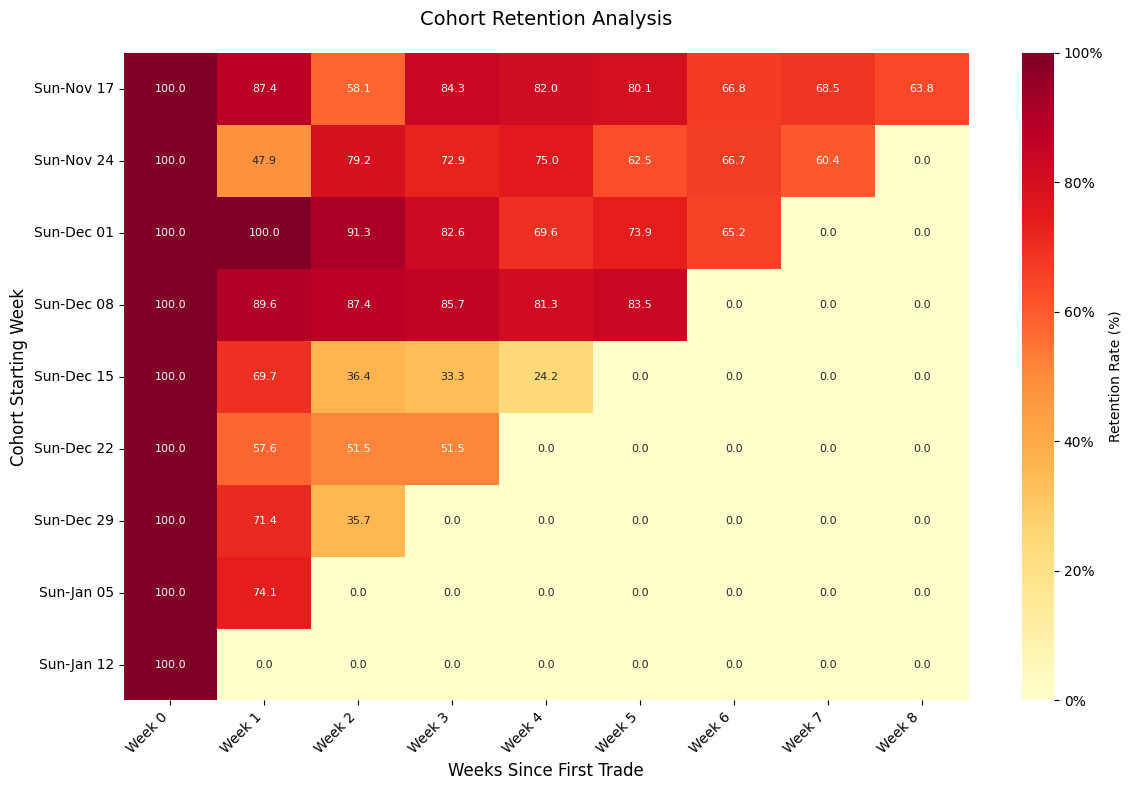

In [27]:
fig = plot_cohort_retention_heatmap(cohort_retention)